In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [10]:
import pandas as pd

# 파일 읽기
df_demo = pd.read_csv('data/demographics(전처리).csv', encoding='utf-8-sig')
df_tel = pd.read_csv('data/tel_data(전처리).csv', encoding='utf-8-sig')
df_loca = pd.read_csv('data/location(전처리).csv', encoding='utf-8-sig')


# 고객ID 기준으로 병합 
merged_demo = pd.merge(df_demo, df_tel, on='고객ID', how='inner')
print(merged.shape)
print(merged.columns)

merged_loca = pd.merge(df_loca, df_tel, on='고객ID', how='inner')
print(merged.shape)
print(merged.columns)


(7043, 30)
Index(['고객ID', '성별_x', '나이', '30세미만여부', '고령자여부_x', '결혼여부', '부양가족여부_x', '부양가족수',
       '성별_y', '고령자여부_y', '배우자여부', '부양가족여부_y', '가입개월수', '전화서비스가입여부', '복수회선여부',
       '인터넷서비스유형', '온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부', '기술지원서비스여부',
       'TV스트리밍이용여부', '영화스트리밍이용여부', '계약기간유형', '전자청구서이용여부', '결제방법', '월요금', '총요금',
       '이탈여부', '인터넷서비스가입여부', '개월수*월요금'],
      dtype='object')
(7043, 30)
Index(['고객ID', '성별_x', '나이', '30세미만여부', '고령자여부_x', '결혼여부', '부양가족여부_x', '부양가족수',
       '성별_y', '고령자여부_y', '배우자여부', '부양가족여부_y', '가입개월수', '전화서비스가입여부', '복수회선여부',
       '인터넷서비스유형', '온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부', '기술지원서비스여부',
       'TV스트리밍이용여부', '영화스트리밍이용여부', '계약기간유형', '전자청구서이용여부', '결제방법', '월요금', '총요금',
       '이탈여부', '인터넷서비스가입여부', '개월수*월요금'],
      dtype='object')


### demographics 원-핫 인코딩

In [66]:
numeric_cols = merged_demo.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = merged_demo.select_dtypes(include=['object']).columns.tolist()

In [67]:
numeric_cols = [col for col in numeric_cols if col != '고객ID']
categorical_cols = [col for col in categorical_cols if col != '고객ID']


In [68]:
merged_encoded = pd.get_dummies(merged, columns=categorical_cols, drop_first=False)


In [69]:
heatmap_data = merged_encoded.drop(columns=['고객ID'])

In [70]:
corr_matrix = heatmap_data.corr()

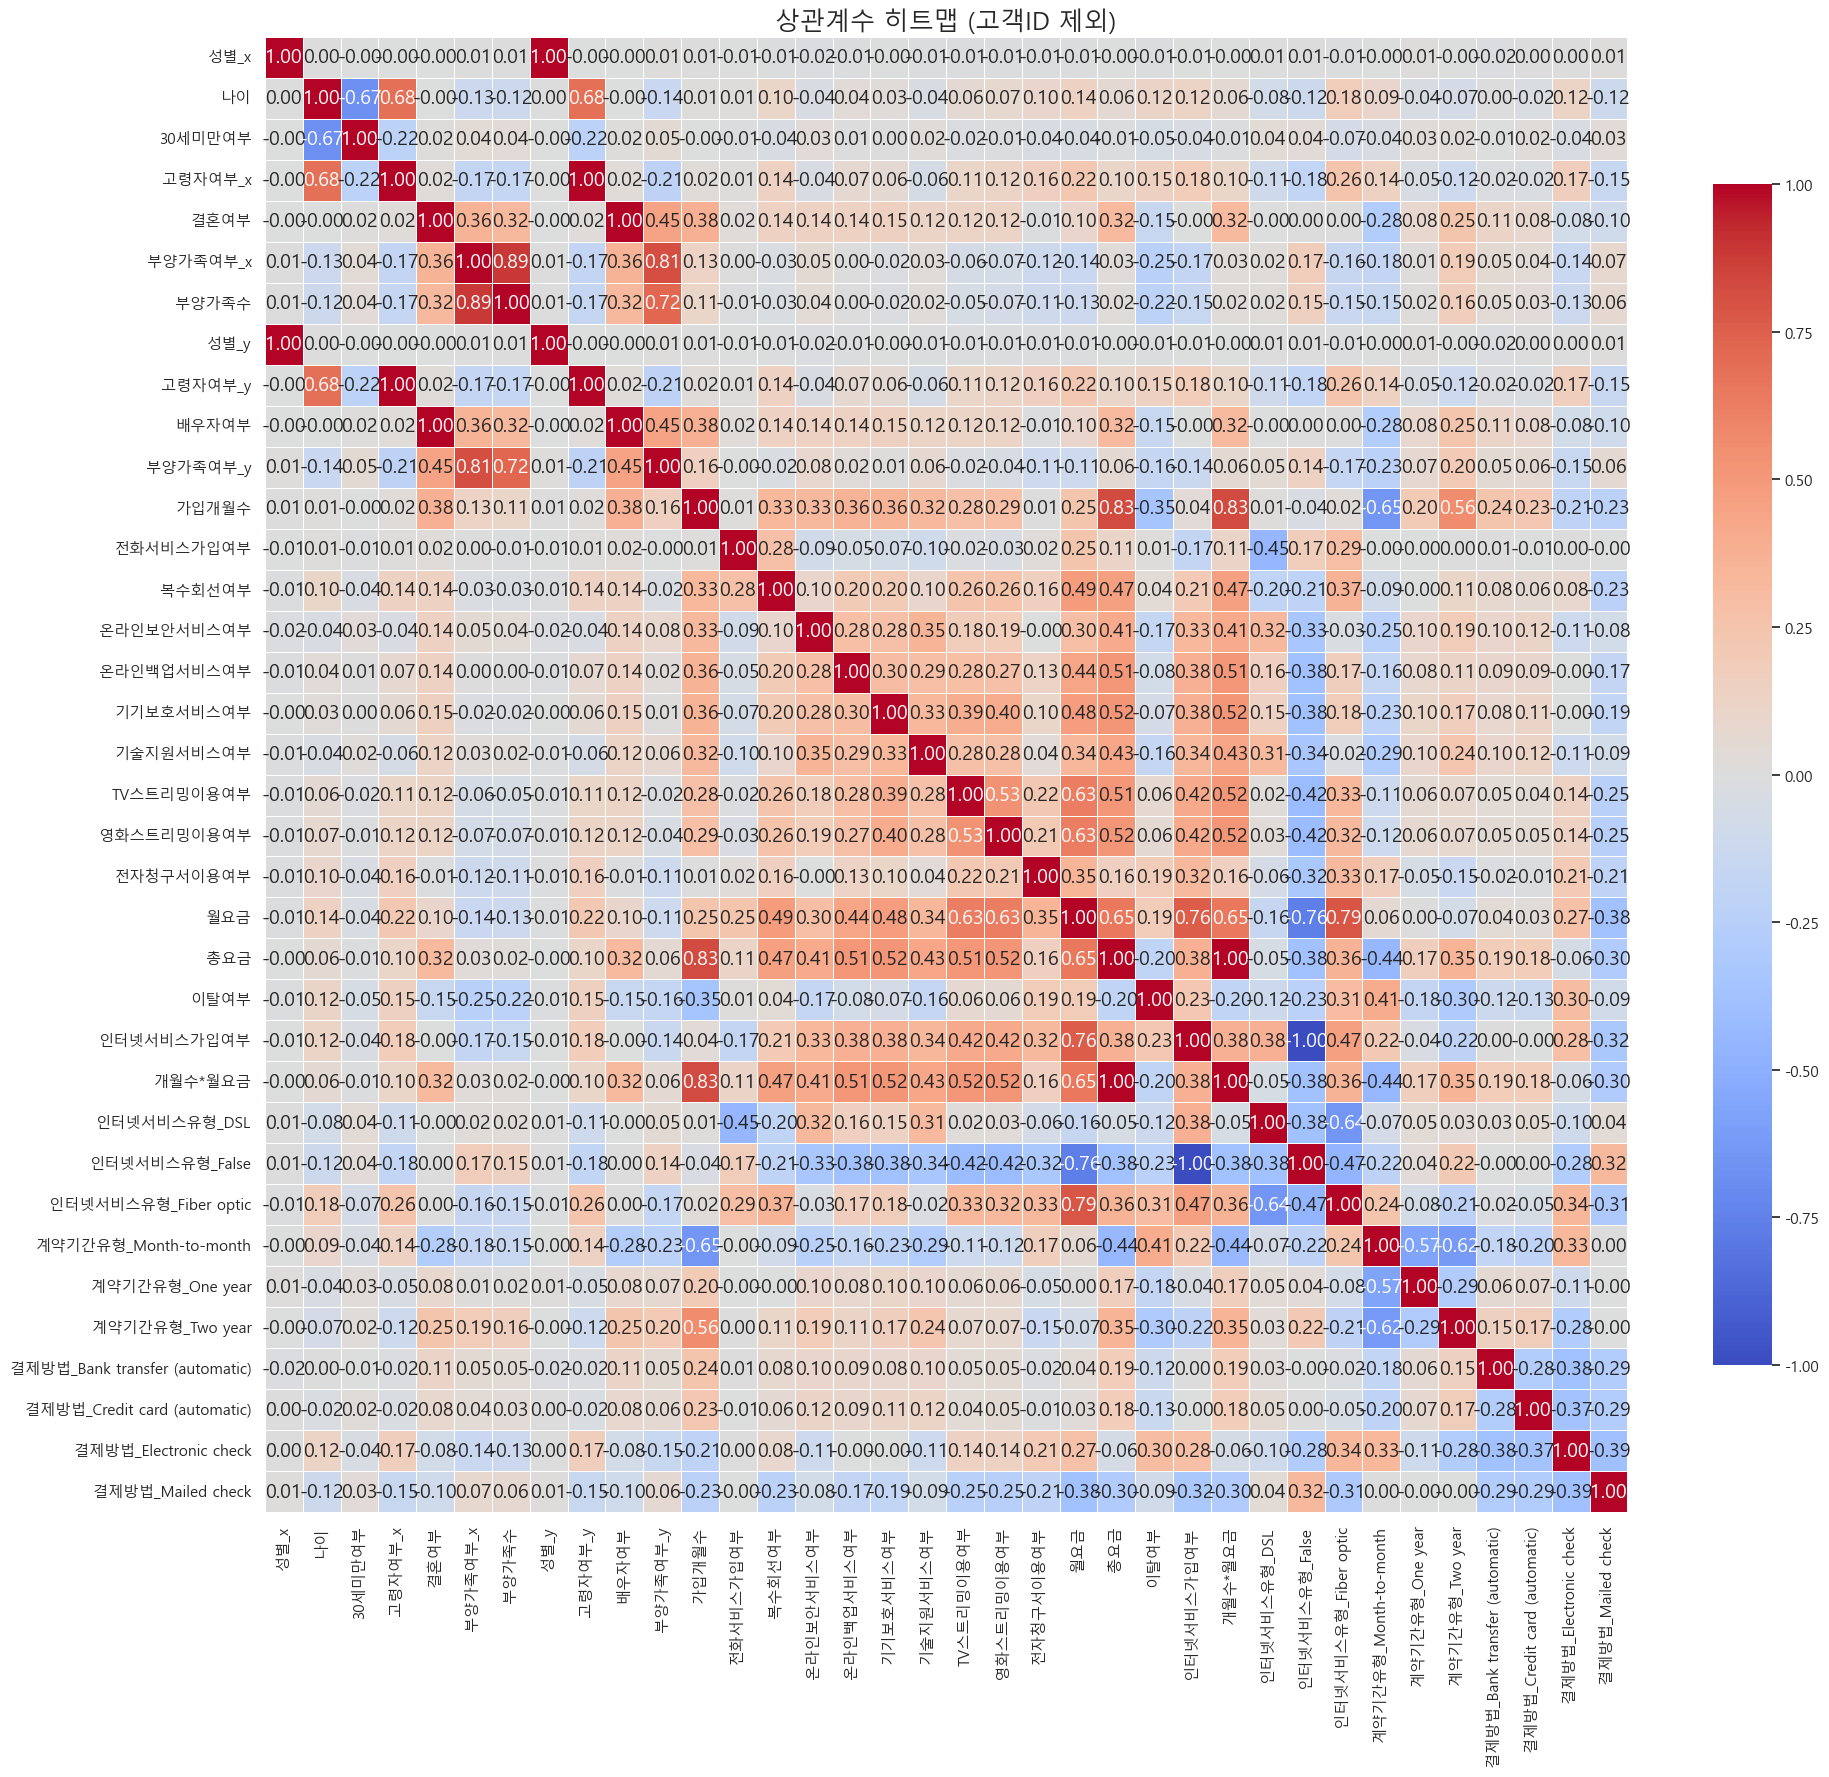

In [71]:
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    annot=True,            # 숫자 표시
    fmt=".2f",              # 소수점 2자리
    cmap='coolwarm',        # 색상 스케일
    vmin=-1, vmax=1,        # 스케일 고정
    linewidths=0.5,         # 셀 경계선
    cbar_kws={"shrink": .8} # 컬러바 크기 조정
)
plt.title('상관계수 히트맵 (고객ID 제외)', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

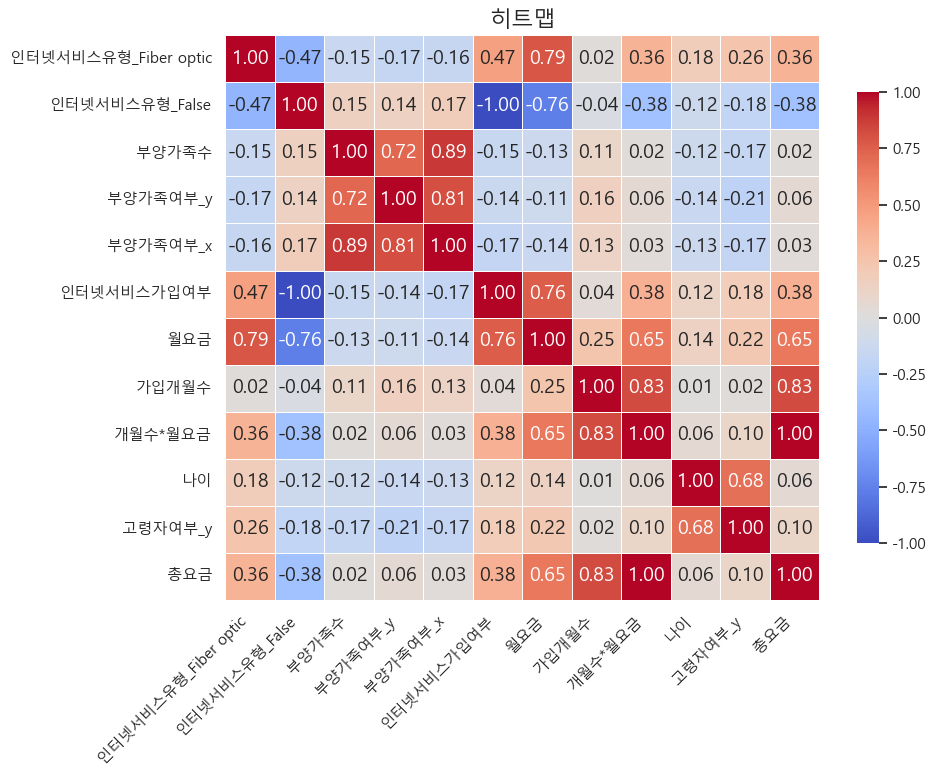

In [72]:

top_features = list(set(top_10_df['Feature 1']).union(set(top_10_df['Feature 2'])))

# 상위 10개 피처들의 서브 상관행렬
sub_corr = corr_matrix.loc[top_features, top_features]

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(
    sub_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('히트맵', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 히트맵을 보고 알 수 있는것
- Fiber optic 요금이 비쌈(연관된 프로모션을 진행하면 좋을듯)
- Mailed check 결제방식을 사용하는 사람들은 인터넷 서비스를 이용하지 않는사람이 많다(인터넷 서비스 가입을 유도하는 마케팅이 필요)

### location 원핫인코딩, 히트맵

In [84]:
selected_cols = merged_loca[['이탈여부', '인터넷서비스유형', '결제방법', '국가', '주', '도시']]

In [86]:
encoded_selected = pd.get_dummies(selected_cols, drop_first=False)

In [87]:
corr_matrix = encoded_selected.corr()

In [88]:
corr_with_churn = corr_matrix['이탈여부'].abs().sort_values(ascending=False)


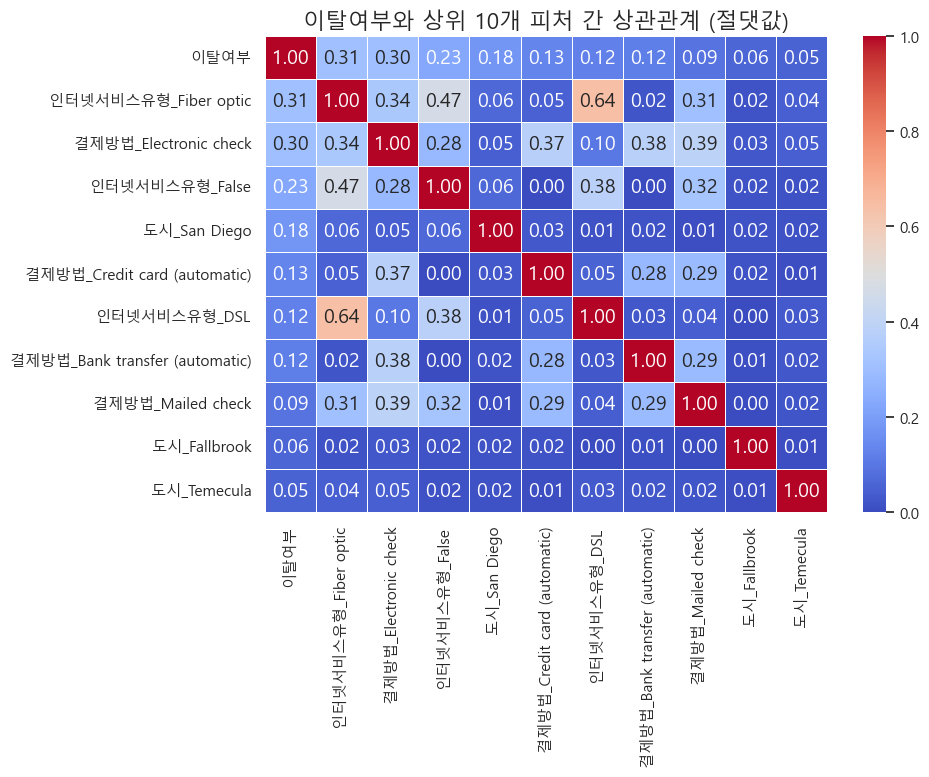

In [89]:
# 상위 10개 이름 추출 (이탈여부 제외)
top_feats = corr_with_churn.index[1:11].tolist()

# 부분 히트맵을 그릴 컬럼 리스트
selected_for_heatmap = ['이탈여부'] + top_feats

# 부분 히트맵 그리기 (절댓값 시각화)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.loc[selected_for_heatmap, selected_for_heatmap].abs(),
    annot=True, fmt=".2f",
    cmap='coolwarm',
    vmin=0, vmax=1,
    linewidths=0.5
)
plt.title('이탈여부와 상위 10개 피처 간 상관관계 (절댓값)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 히트맵을 보고 알 수 있는것
- 국가, 주에 따라 결제방법이나 인터넷서비스 유형은 크게 차이가 없음